# The Price is Right
## Helping Homeowners Find The Right Priece to Sell Their Home

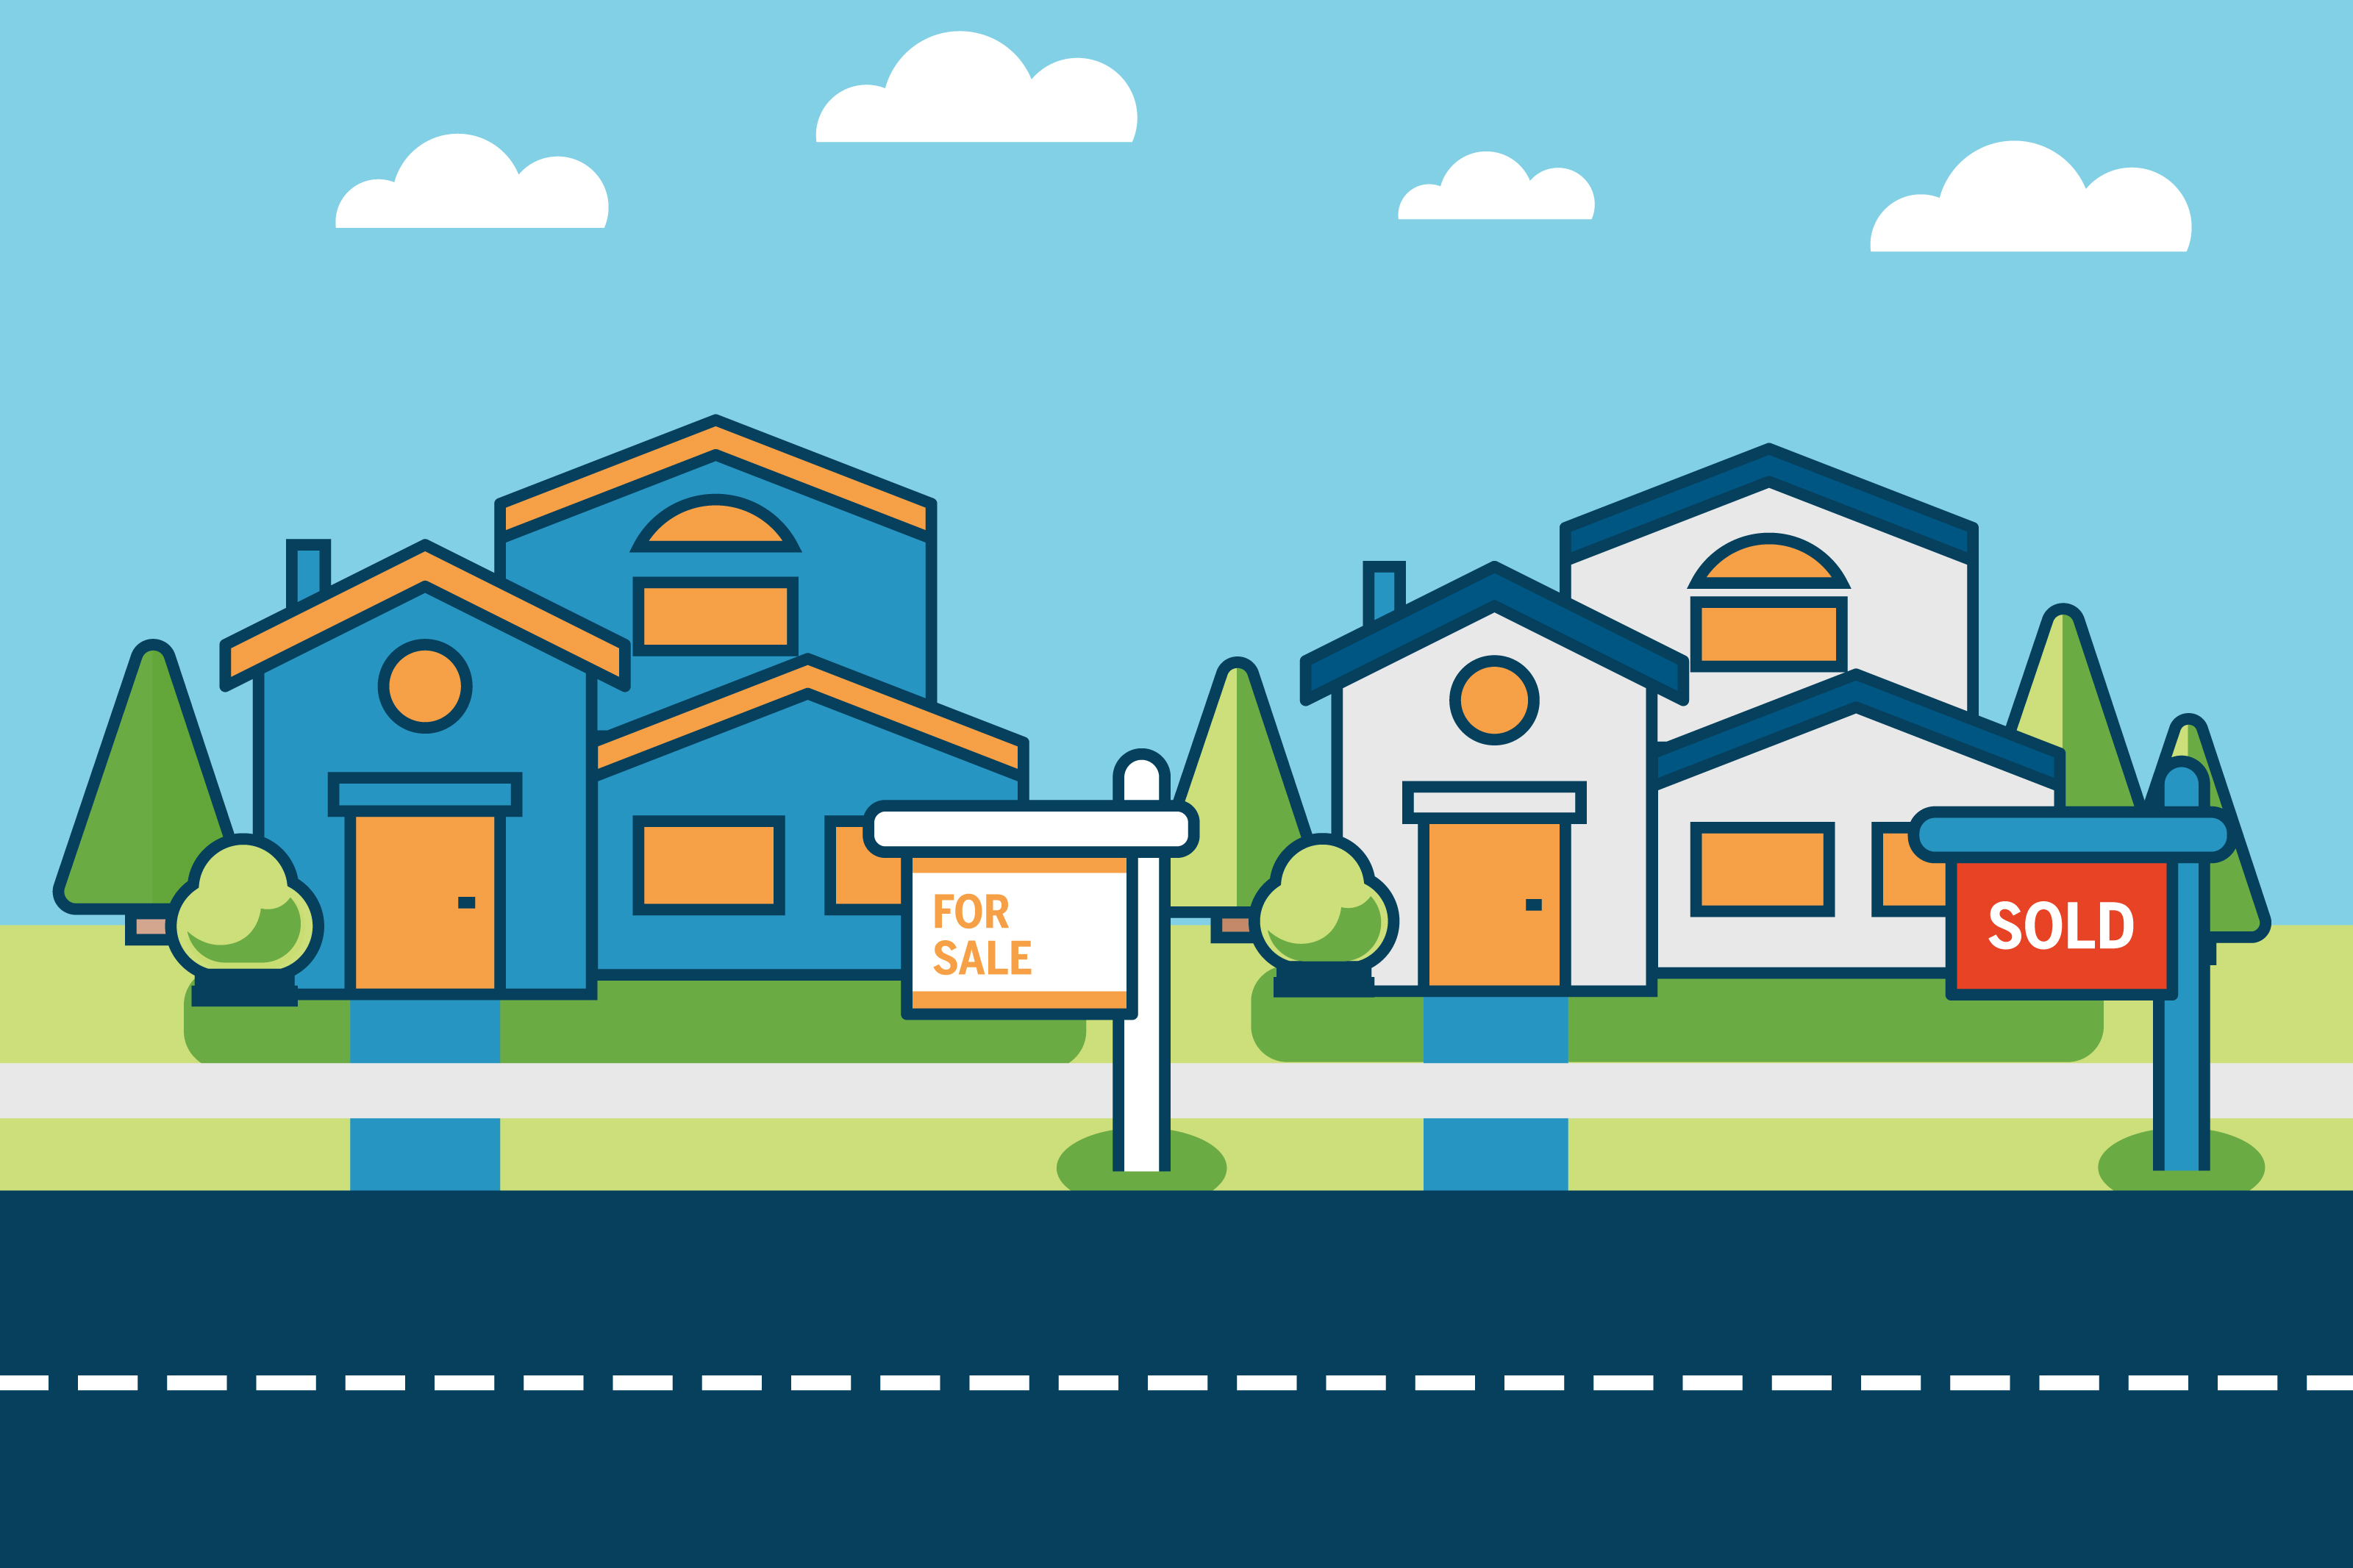

In [1]:
from IPython.display import Image
Image("/Users/matthewnykaza/Documents/Flatiron/Phase_2_Project/dsc-phase-2-project/images/home_selling_pic.jpg")


# Overview 
For this project I was given, by the Flatiron school, a dataset consisting of the King Country Housing sales over a period of May 2014 to May 2015. I was tasked with finding a relevant business problem and conducting analysis using the given data and conducting statistical models to answer the business question. I decided to try and help basic homeowners find the appropriate price to list their home at, given basic variable (bedrooms, bathrooms, lot size etc.). I began this process by preprocessing the data by taking out unneccesary variables (i.e. views, sqft basement, etc.) and changing some of the variables (changing basement size to whether or not the home has a basement for example). Once this basic data cleaning was complete I set out to create a base model just to see what the correlations, r2 score and other relevant testing metrics looked like before doing any standardization techniques. With that subpar model complete I began to change the data using standardization and normalizing techniques. This started with log-transforming the target variable (selling price) which turned that variable into a much more normal distribution. Following that I used a standard scaler from sklearn which removed the mean from the independant variables and scaled to the variance. This did not necesarily make the data "more normal", but it did bring center the data around a mean of 0 with a standard deviation of 1. This did improve on my model somewhat, but overall did not make my prediction power (as read by R2 score) any stronger. My final model featured log-transformed, and Standard Scaled data, which did not improve the R2 score, but did provide the least error, and gives me confidence that there is something strong to go on here. I recommend that a home seller not use this model quite yet, but with more time I am confident that there can be a great conclusion reached, and a accurate home selling model. 

# Business Problem
Selling a home can be an exceedingly stressful process. One of the biggest pain points for home sellers is selecting the correct listing price for that home. Pick a price that is too low, and you run the risk of losing out on a lot of potential earnings. To high and you can wind up with a house that remains on the market for a long time, potentially hamstringing efforts to move into that new house. With this dataset, and statistical knowledge I intend to create a model that will assist with people knowing the right price to list their home at. 

In [2]:
#Start with loading in all the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.feature_selection import RFE
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf




# King Count Housing Dataset
- In this modeling I used data provided to me by Flatiron School. It consists of a single dataset that include relevant information about housing sales from May 2014 to May 2015 in King County, WA. 
- There are many variables in this dataset and they include home ID (a simple identifier unique to each sold home), selling price, number of bedrooms and bathrooms, square feet of the living space, squarefeet of the total lot, number of floors, whether the home is on the waterfront or not, whether the home has been viewed or not, a overall condition rating, a King County Housing grade, year built, year remodeled, zipcode it is in, the latitude and longitude of the location, and the square feet of the 15 surrounding homes lots and living space. 
- The target variable for this modeling will be the selling price ('price' in the data).
- The feature variables that I will be using for this project will be bedrooms, bathrooms, sqft_lot, floors, waterfront, condition, grade, and year built. 

In [3]:
#Load in the dataset and take a look at its overview
data = pd.read_csv('data/kc_house_data.csv')

In [4]:
#Take a look at the first 5 rows of data
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
#Check out the columns
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
#Check out the basic stats for the dataset
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## A few things noticed here
1. Outliers in a bunch of the categories 
    * Especially bedrooms, bathrooms, sqft_lot and sqft_lot15

In [7]:
#Look for any NaN data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## A few things noticed here
1. We have a few NaNs
2. date and swft_basement are the only two columns with a data type as "object", this makes sense for date, but why sqft_basement?

In [8]:
#As show in data.info() sqft_basement is an object, but why
print(data.groupby('sqft_basement')['id'].nunique())

sqft_basement
0.0       12718
10.0          1
100.0        42
1000.0      146
1008.0        1
          ...  
960.0        65
970.0        44
980.0        55
990.0        51
?           454
Name: id, Length: 304, dtype: int64


Some 454 are listed as ?, we're just going to make an assumption that this means they don't have a basement because in my opinion it is pretty easy for someone to tell if a place does or not, we will make these values 0.

In [9]:
#Change '?' to 0 in sqft_basement and check
data['sqft_basement'] = data['sqft_basement'].replace(['?'], 0)

In [10]:
#Sanity check
data.loc[lambda df: df['sqft_basement']== '?'] 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [11]:
#Now change them to numeric in the same way the other sqft variables are
data['sqft_basement'] = data[['sqft_basement']].apply(pd.to_numeric)

In [12]:
#Sanity check
data['sqft_basement'].dtype

dtype('float64')

In [13]:
# Idea on distribution of data with a histogram
#Going to createa a function that will make this process easier in the future, as we will pull histograms multiple
#times throughout the process
#Lets create a histogram to check for normalality
def histogram_view(data_set):
    """This will produce 3 columns of histograms and a corresponding number
    of rows depending on the len(data_set.columns). The result will be a 
    side by side view of all of the histograms of each column in a data set"""
    ncols = 3
    nrows = int(np.ceil(len(data_set.columns) / (1.0*ncols)))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))
    # Lazy counter so we can remove unwated axes
    counter = 0
    for i in range(nrows):
        for j in range(ncols):

            ax = axes[i][j]

            # Plot when we have data
            if counter < len(data_set.columns):

                ax.hist(data_set[data_set.columns[counter]], bins=20, color='blue', alpha=0.5, label='{}'.format(data_set.columns[counter]))
                ax.set_xlabel('{}'.format(data_set.columns[counter]))
                ax.set_ylabel('Density')
                leg = ax.legend(loc='best')
                leg.draw_frame(True)
                ax.grid(which='both', axis='both', linestyle='-')
            # Remove axis when we no longer have data
            else:
                ax.set_axis_off()

            counter += 1

    plt.show()

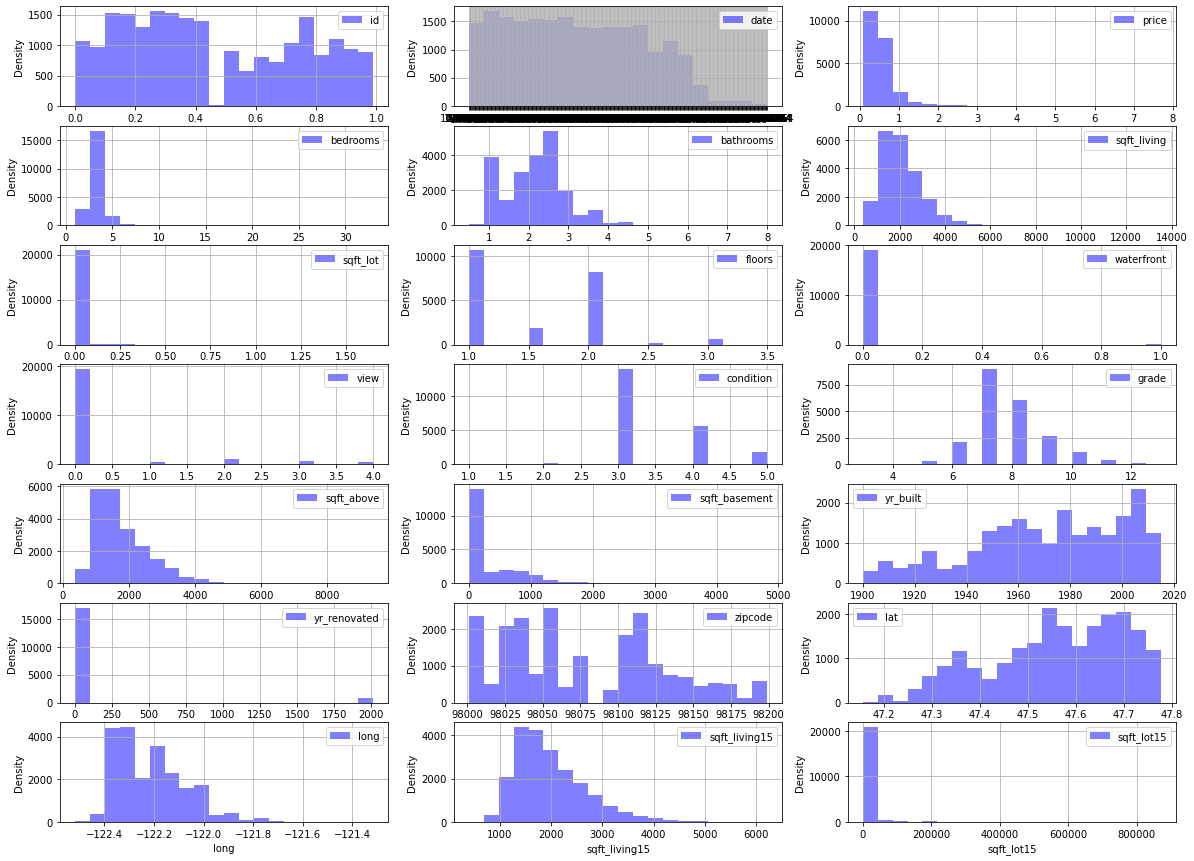

In [14]:
histogram_view(data)

We can already get the sense that much of the data is far from normal especially in the cases of id, date, and sqft_basement. For now we are not worrying about the normalilty of the categorical variables which look to be bedrooms, bathrooms, floors, waterfront, view, condition, grade, yr_built, yr_renovated, zipcode, lat and long. 

# Data preprocessing 
- First I just wanted to make a basic check for any duplicates in the data
- NaN data was addressed and major outliers were identified and corrected accordingly
- Upon starting this project I decided to drop the date, view, sqft_above, yr_renovaged, zipcode, lat, long, sqft_living15 and sqft_lot15 the reasoning for that can be seen below. 
- After dropping those named variables I went to check about any NaN data. 
- - The only category was the Waterfront category, and handling of that issue can be seen below. 
- Then I took a look for outliers which 




## Check for Duplicates
- Will be using the ID column for this 

In [15]:
duplicates = data[data.id.duplicated(keep=False)]
duplicates

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NaN,0.0,...,8,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
21564,7853420110,10/3/2014,594866.0,3,3.00,2780,6000,2.0,0.0,0.0,...,9,2780,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000


There looks to be some duplicates, but all of them seem to make sense and simply looks like they are the same home being resold numerous times. With the duplicates only representing roughly 2% of the data we are not going to worry about them.

## NaN Data

In [16]:
#Dealing with NaN's
data.info()
#Looks to be only the waterfront column, so lets dig into that one

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [17]:
#Let's do a quick check on the counts of the waterfront column to give us a better idea of how to handle the outliers
print(data.groupby('waterfront')['id'].nunique())


waterfront
0.0    18941
1.0      146
Name: id, dtype: int64


As determined by the histogram the waterfront variable is a categorical variable. There are roughly 2,000 NaNs in that variable, but with only 146 waterfront homes in total on the dataset I believe that instead of removing the NaNs it is pretty safe to assume that these NaNs are non-waterfront homes and will simply fill them in at 0 indicating they are not on a waterfront.

In future modeling this can be improved by comparing the NaNs and their lat and long values to verify whether or not this is actually the case.

In [18]:
#Fill with 0 and sanity check
data['waterfront'] = data['waterfront'].fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We have confirmed that all outliers were successfully removed from waterfront, now we do have some in the view and yr_renovated categories, but we will not worry about those will be removed, but more on that later.

## Outliers
We're just going to look at the previously highlighted columns of bedrooms, bathrooms, sqft_lot and sqft_lot15

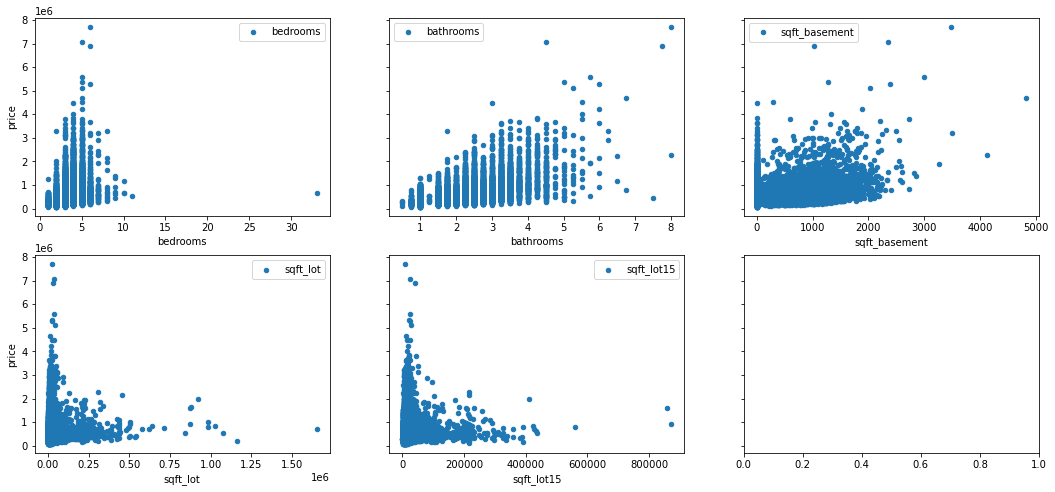

In [19]:
outlier_col = ['bedrooms', 'bathrooms', 'sqft_basement', 'sqft_lot', 'sqft_lot15']
fig, axes = plt.subplots(2,3,sharey=True, figsize=(18,8))
axe  = axes.ravel()
for idx, column in enumerate(data[outlier_col]):
    data.plot(kind='scatter', x=column, y='price', ax=axe[idx], label=column)

1. bedrooms has a clear outlier of 33, going to remove that one
2. bathrooms has a few outliers as well, but those are a little closer together, and I think we'll have a different method of dealing with that variable
3. sqft_basement certainly has some outliers, but they too do not look too out of whack, and we have a different plan for that variable as to be seen later
4. One major outlier here, probably going to remove that one
5. Two major outliers here, same as sqft_lot, going to remove those

A quick look shows that there are some outliers in bedrooms, bathrooms, sqft_living, and sqft_loft. I will look at the bedrooms and bathrooms columns to get an idea of what the outliers look like. 

In [20]:
#Get a closer look at the bathrooms and bedrooms columns (should be easier as these are categorical)
print(data.groupby('bedrooms')['id'].nunique())
print(data.groupby('bathrooms')['id'].nunique())

bedrooms
1      191
2     2736
3     9731
4     6849
5     1586
6      265
7       38
8       13
9        6
10       3
11       1
33       1
Name: id, dtype: int64
bathrooms
0.50       4
0.75      70
1.00    3794
1.25       9
1.50    1429
1.75    3020
2.00    1913
2.25    2031
2.50    5352
2.75    1182
3.00     747
3.25     586
3.50     729
3.75     155
4.00     134
4.25      79
4.50      99
4.75      23
5.00      21
5.25      13
5.50      10
5.75       4
6.00       6
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
8.00       2
Name: id, dtype: int64


For the data the bathrooms are consistent from .5 to 8 while there is a pretty heavy tail, I think that using some preprocessing techniques will be the real answer here. 
For the bedrooms the 33 bedroom home is a massive outlier, and I will simply take that one out of the equation. 

In [21]:
#Take all the bathrooms and round them to the nearest full number, this will make later O-H-E have fewer columns 
#that have very little values in them. 
data.loc[data['bathrooms'] <= 1.25, 'bathrooms'] = 1
data.loc[(data['bathrooms'] >=1.25) & (data['bathrooms']<= 2.25), 'bathrooms'] = 2
data.loc[(data['bathrooms'] >=2.25) & (data['bathrooms']<= 3.25), 'bathrooms'] = 3
data.loc[(data['bathrooms'] >=3.25) & (data['bathrooms']<= 4.25), 'bathrooms'] = 4
data.loc[(data['bathrooms'] >=4.25) & (data['bathrooms']<= 5.25), 'bathrooms'] = 5
data.loc[(data['bathrooms'] >=5.25) & (data['bathrooms']<= 6.25), 'bathrooms'] = 6
data.loc[(data['bathrooms'] >=6.25) & (data['bathrooms']<= 7.25), 'bathrooms'] = 7
data.loc[(data['bathrooms'] >=7.25) & (data['bathrooms']<= 8.25), 'bathrooms'] = 8

In [22]:
#Sanity check
print(data.groupby('bathrooms')['id'].nunique())

bathrooms
1.0    3877
2.0    8393
3.0    7867
4.0    1097
5.0     156
6.0      22
7.0       4
8.0       4
Name: id, dtype: int64


In [23]:
#Just remove that 33 bedroom outlier, that might even just be mistyped or anything, but one value will not
#Effect the model.
data = data[data.bedrooms != 33]
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.0,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.0,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.0,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.0,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.0,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Bedrooms and bathrooms outliers have been taken care of, now we'll move on to our sqft_lot and sqft_lot15

In [24]:
data.sort_values(by=['sqft_lot'], ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1717,1020069017,3/27/2015,700000.0,4,1.0,1300,1651359,1.0,0.0,3.0,...,6,1300,0.0,1920,0.0,98022,47.2313,-122.023,2560,425581
17305,3326079016,5/4/2015,190000.0,2,1.0,710,1164794,1.0,0.0,0.0,...,5,710,0.0,1915,0.0,98014,47.6888,-121.909,1680,16730
7640,2623069031,5/21/2014,542500.0,5,3.0,3010,1074218,1.5,0.0,0.0,...,8,2010,1000.0,1931,0.0,98027,47.4564,-122.004,2450,68825
7762,2323089009,1/19/2015,855000.0,4,4.0,4030,1024068,2.0,0.0,0.0,...,10,4030,0.0,2006,0.0,98045,47.4619,-121.744,1830,11700
3945,722069232,9/5/2014,998000.0,4,3.0,3770,982998,2.0,0.0,0.0,...,10,3770,0.0,1992,0.0,98058,47.4140,-122.087,2290,37141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20588,7899800857,12/15/2014,256950.0,2,2.0,1070,635,2.0,0.0,0.0,...,9,720,350.0,2008,NaN,98106,47.5212,-122.357,1070,928
3449,2559950110,4/22/2015,1230000.0,2,3.0,2470,609,3.0,0.0,0.0,...,11,1910,560.0,2011,0.0,98112,47.6182,-122.312,2440,1229
7582,6371000026,1/22/2015,367500.0,2,2.0,1030,600,2.0,0.0,0.0,...,8,680,350.0,2004,0.0,98116,47.5788,-122.410,1120,1267
5821,1773101159,1/7/2015,250000.0,3,2.0,1050,572,2.0,0.0,0.0,...,7,740,310.0,2006,0.0,98106,47.5549,-122.363,1260,1062


Looks like that one major 5000 sqft outlier, let's remove it as to mitigate any muddiness of the data later on

In [25]:
#remove and check for removal
data = data[data.sqft_lot != 1651359]
data.loc[lambda df: df['sqft_lot']== 1651359] 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [26]:
#Do the same as above for sqft_lot15
data.sort_values(by=['sqft_lot15'], ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9705,225079036,1/7/2015,937500.0,4,4.0,5545,871200,2.0,0.0,0.0,...,11,3605,1940.0,2003,0.0,98014,47.6760,-121.882,3420,871200
20436,1125079111,4/15/2015,1600000.0,4,6.0,6530,871200,2.0,0.0,2.0,...,11,6530,0.0,2008,0.0,98014,47.6640,-121.878,1280,858132
13451,3420069060,11/7/2014,790000.0,3,3.0,2640,432036,1.5,0.0,3.0,...,10,2640,0.0,1996,0.0,98022,47.1795,-122.036,1500,560617
8655,3226079059,10/19/2014,549950.0,3,2.0,2930,266587,2.0,0.0,0.0,...,8,2440,0.0,1995,0.0,98014,47.6991,-121.947,2700,438213
3797,1550000463,8/26/2014,637000.0,4,4.0,3080,118918,2.0,0.0,0.0,...,9,3080,0.0,2008,0.0,98019,47.7721,-121.924,1830,434728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20891,8562780540,12/22/2014,325000.0,2,2.0,1150,711,2.0,0.0,0.0,...,7,1150,0.0,2013,NaN,98027,47.5323,-122.070,1150,748
20999,8562780530,3/28/2015,338500.0,2,2.0,1150,711,2.0,0.0,0.0,...,7,1150,0.0,2013,NaN,98027,47.5323,-122.071,1150,748
513,2827100070,11/5/2014,290000.0,4,1.0,1330,8184,1.5,0.0,0.0,...,7,1330,0.0,1949,0.0,98133,47.7343,-122.347,1220,660
20733,2827100075,7/27/2014,286308.0,2,2.0,1220,1036,3.0,0.0,0.0,...,7,1220,0.0,2006,0.0,98133,47.7348,-122.347,1210,659


This time we have two outliers, but they two are by a considerable margin so we will remove them from the data

In [27]:
data = data[data.sqft_lot15 != 871200]
data = data[data.sqft_lot15 != 858132]
data.loc[lambda df: df['sqft_lot15']> 858131] 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


## Check Assumptions
1. Linearity - Needs a linear relationship between x and y to get linear regression
2. Normality - Residuals are normally distributed
    * Check after modeling 
3. No multicollinearity = independant variables not highly correlated 
4. Homoscedasticity - variance of error terms are similar across the values of the independant variables
    * Check after modeling

In [28]:
#Let's create scatterplots of all our data to get an idea linear relationships
#We can also use this to check our outliers
def scatter_view(data_set):
    ncols = 3
    nrows = int(np.ceil(len(data_set.columns) / (1.0*ncols)))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharey=True, figsize=(20, 15))
    axe  = axes.ravel()
    for idx, column in enumerate(data_set.columns):
        data_set.plot(kind='scatter', x=column, y='price', ax=axe[idx], label=column)


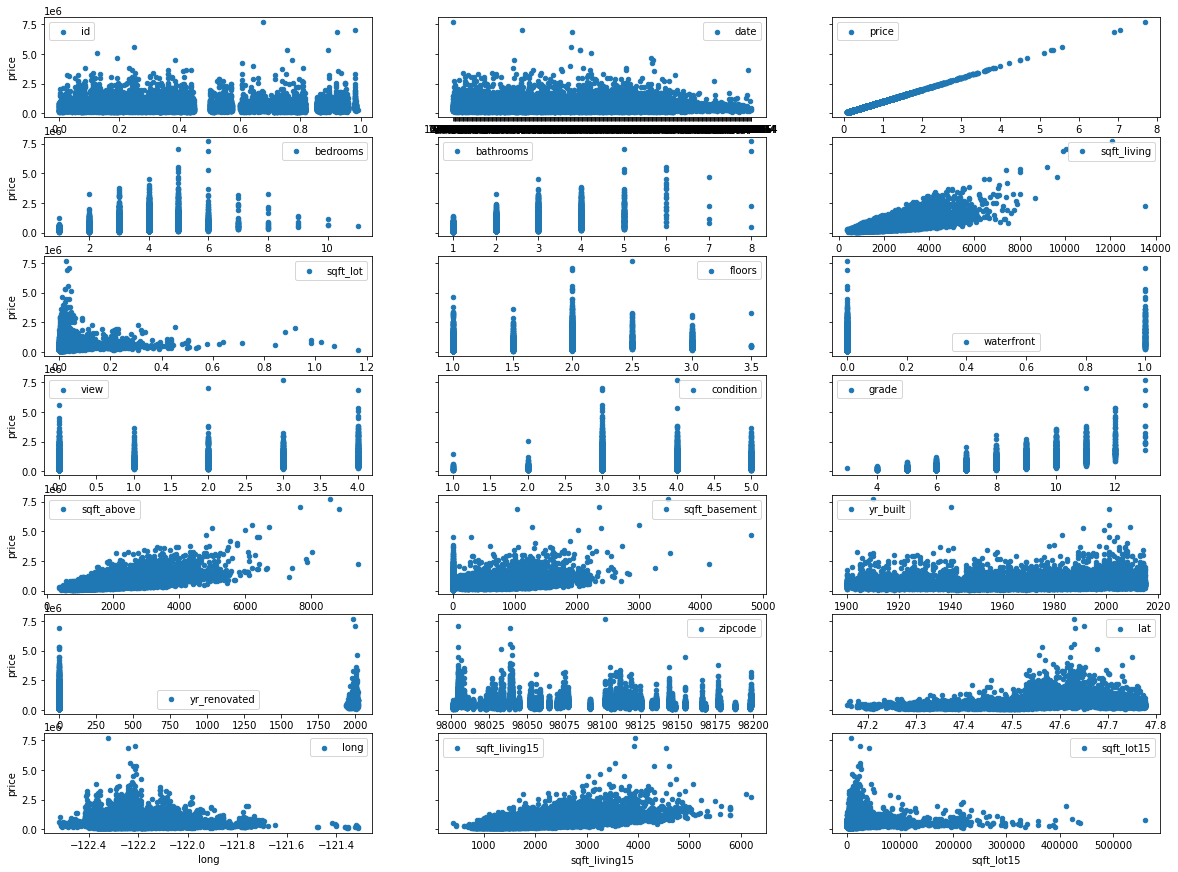

In [29]:
scatter_view(data)

## Some takeaways
- Our outliers look mostly mitigated, especially in the columns we are most concerned about
- id, date, yr_built, yr_renovated, zipcode, lat, long and sqft_lot15 don't seem to have much of a correlation

<AxesSubplot:>

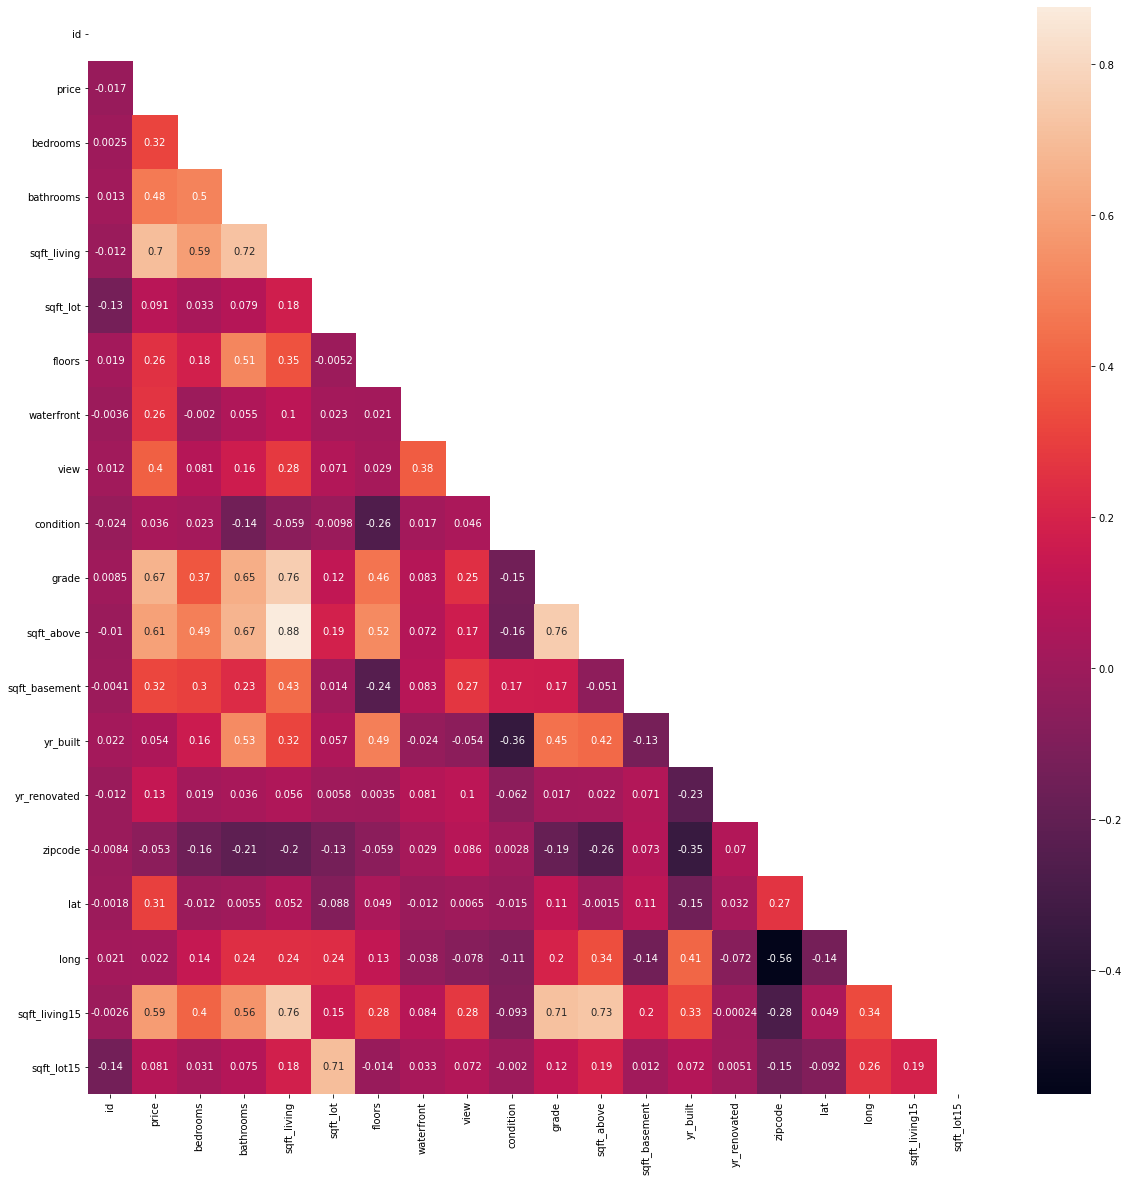

In [30]:
#Heatmap to double check
plt.figure(figsize=(20,20))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, mask=matrix)

With this heatmap we are simply looking for any bit of correlation along the price
- 1 is perfect correltaion
- .5 is medium
- .3 and less is small to nill
- 0 is no correlation


While this would not be exactly normal we are going to set an alpha level of .2 for our correlation, anything less will be tossed out, anything more will be kept
Lost features - id, date (is an object and won't show here), sqft_lot, condition, yr_built, yr_renovated, long, lat (while it does correlate, it doesn't really do us much good if we don't have long), sqft_lot15

We will additionally remove view, as our business problem is trying to help people find a price to list their homes at there is no way for them to know how many views they will get.



In [31]:
#Remove unneeded columns to make data easier to digest, with reasoning
data.drop(['id','date', 'view', 'sqft_lot', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_lot15'], axis=1, inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,grade,sqft_above,sqft_basement,sqft_living15
0,221900.0,3,1.0,1180,1.0,0.0,7,1180,0.0,1340
1,538000.0,3,2.0,2570,2.0,0.0,7,2170,400.0,1690
2,180000.0,2,1.0,770,1.0,0.0,6,770,0.0,2720
3,604000.0,4,3.0,1960,1.0,0.0,7,1050,910.0,1360
4,510000.0,3,2.0,1680,1.0,0.0,8,1680,0.0,1800


Reasoning for removing columns
- id
    - Now that we have checked duplicates we no longer really need the id as there is no correlation
- date
    - Will be difficult to put into a linear model, as well as be hard to have any use going into the future
- view
    - Does not fit our business problem 
-  sqft_lot and sqft_lot15
    - Looking at correlations it does not appear that lot has much of an impact on selling price 
        - Mind you I am sure this is all location based, and if we had more time to refine the model we could reinclude this. 
- yr_built
    - Scatter and heatmap do not show much of a correlation here
- yr_renovated
    - There is a lot of NaN values here, and it will be difficult to select a proper metric for that NaN data that will not end up skewing our model
- zipcode
    - There are greater than 70 zipcodes in the dataset, and for the current project it will be too time consuming to put them into different bins and model on that. Again, could be good for future modeling
        - Likely helpful in further investigations
- lat, long
    - Each home has it's own value, and otherwise similar reasoning as the zipcode column
        - A point to look at for further investigation 


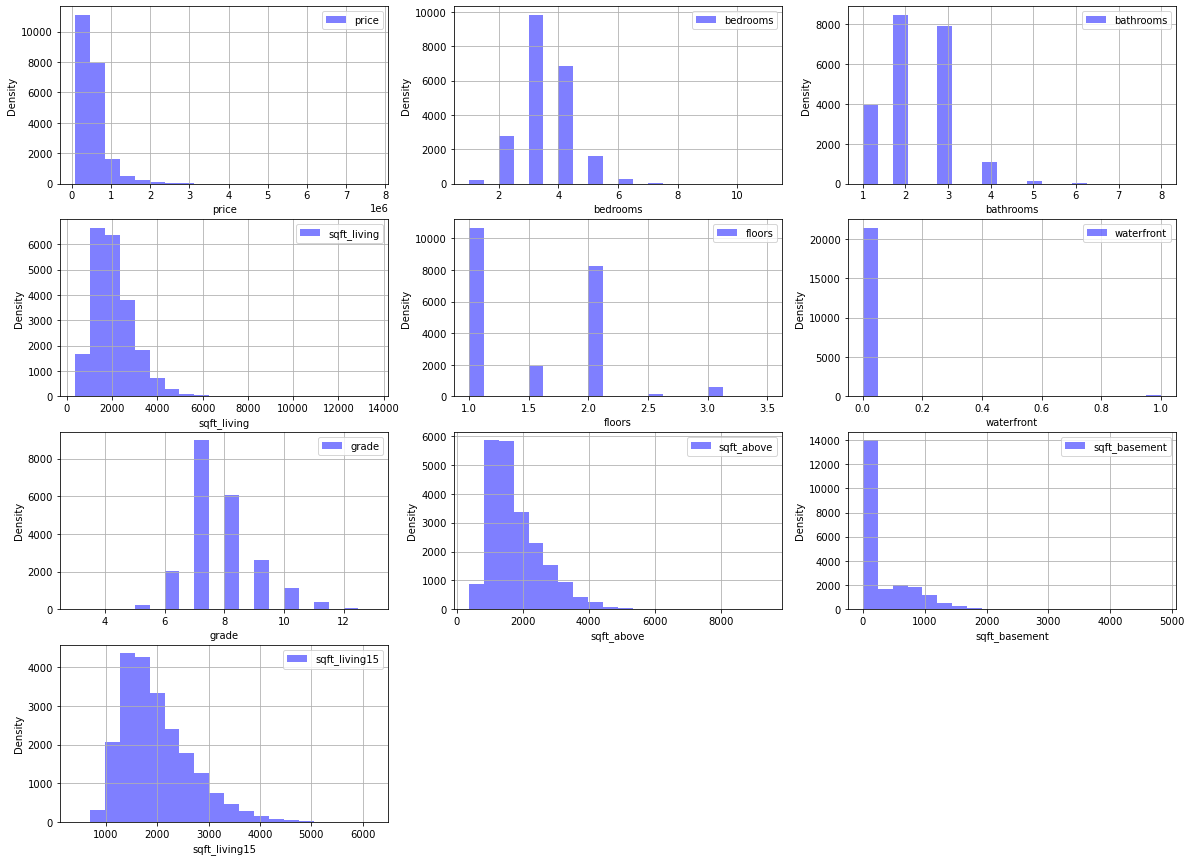

In [32]:
#Lets take an overview of our remaining data
histogram_view(data)

Most of the data at least looks somewhat normal, at least we should be able to standardize and such to get better results

## Dealing with the massive tail of sqft_basement

In [33]:
#sqft_basement has many values that are 0, going to create a new column that is basement which will have a 0 
#for no basement, and 1 for has basement (which will be determined as 0 sqft_basement = no basement, anything else has
#a basement)
conditions = [(data['sqft_basement']==0), (data['sqft_basement'] > 0)]
values = [0,1]
data['basement'] = np.select(conditions, values)
data.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,grade,sqft_above,sqft_basement,sqft_living15,basement
0,221900.0,3,1.0,1180,1.0,0.0,7,1180,0.0,1340,0
1,538000.0,3,2.0,2570,2.0,0.0,7,2170,400.0,1690,1
2,180000.0,2,1.0,770,1.0,0.0,6,770,0.0,2720,0
3,604000.0,4,3.0,1960,1.0,0.0,7,1050,910.0,1360,1
4,510000.0,3,2.0,1680,1.0,0.0,8,1680,0.0,1800,0


In [34]:
#Drop obsolete sqft_basement column
data.drop(['sqft_basement'], axis=1, inplace=True)
#Sanity check
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'grade', 'sqft_above', 'sqft_living15', 'basement'],
      dtype='object')

## Dealing with categorical data

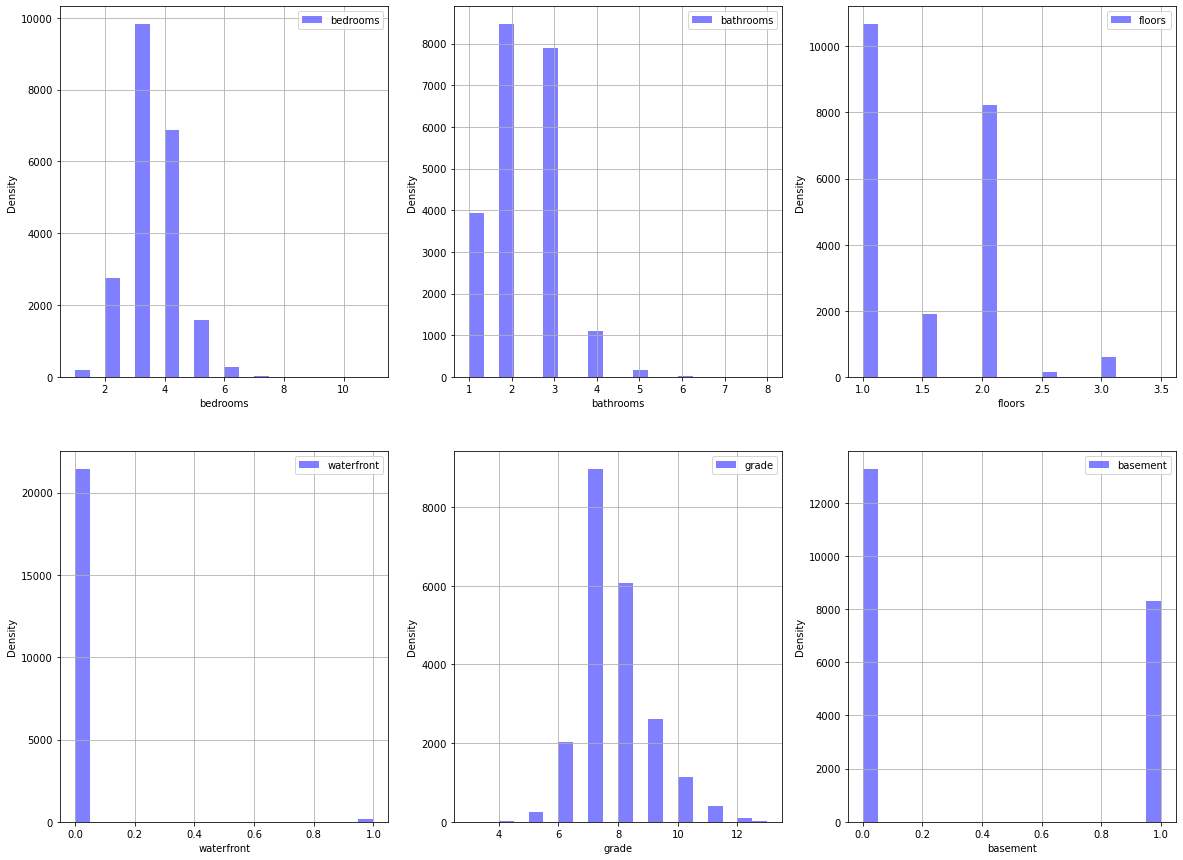

In [35]:
#Check out histograms and Scatter plots
categoricals = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'grade', 'basement']
histogram_view(data[categoricals])

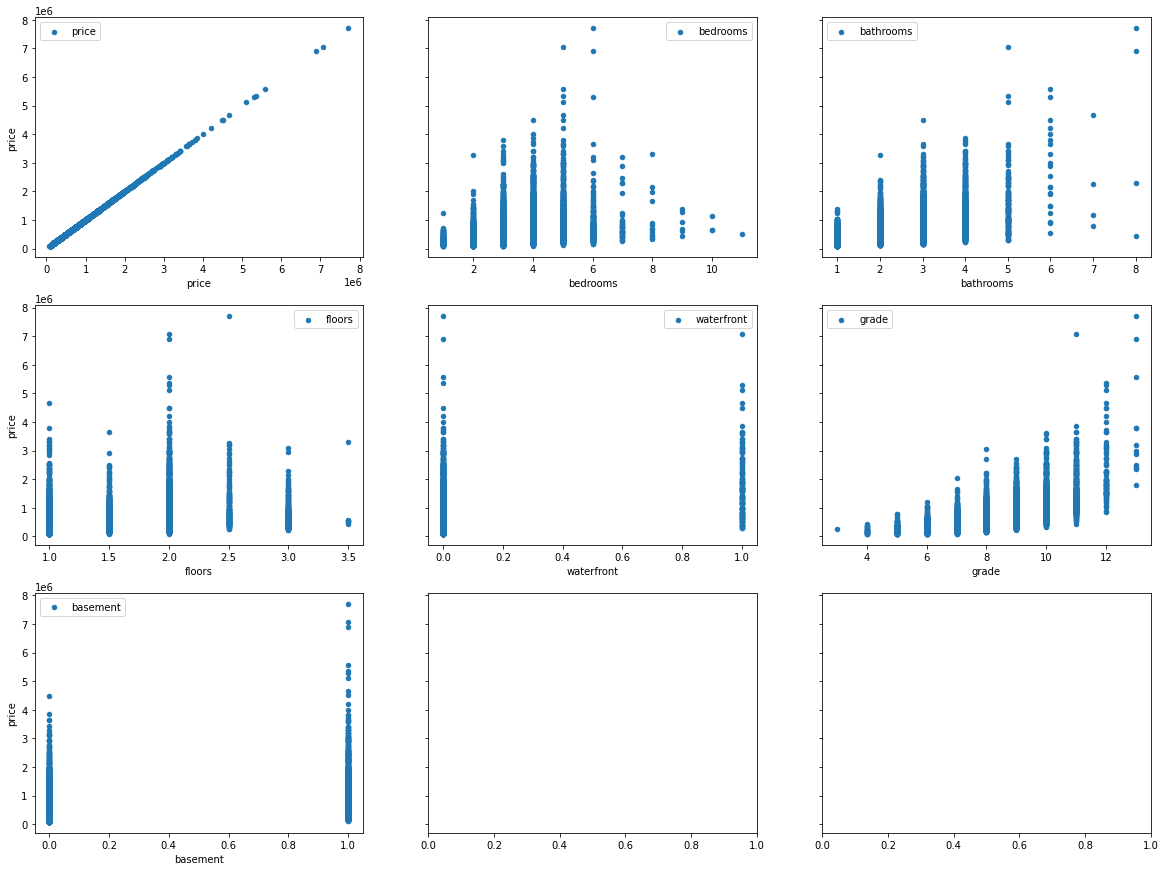

In [36]:
#Add price back in to cat_data to 
categoricals_w_price =['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'grade', 'basement']
scatter_view(data[categoricals_w_price])

Looks like most of our conditionals have some sort of solid relationship with our price. 

##ONE HOT ENCODING

In [37]:
#Check data types to get ready to O-H-E
#We had an issue with these not being in category when running this before
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21593 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21593 non-null  float64
 1   bedrooms       21593 non-null  int64  
 2   bathrooms      21593 non-null  float64
 3   sqft_living    21593 non-null  int64  
 4   floors         21593 non-null  float64
 5   waterfront     21593 non-null  float64
 6   grade          21593 non-null  int64  
 7   sqft_above     21593 non-null  int64  
 8   sqft_living15  21593 non-null  int64  
 9   basement       21593 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.8 MB


In [38]:
cat_data = data[categoricals].astype('category')

In [39]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21593 entries, 0 to 21596
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   bedrooms    21593 non-null  category
 1   bathrooms   21593 non-null  category
 2   floors      21593 non-null  category
 3   waterfront  21593 non-null  category
 4   grade       21593 non-null  category
 5   basement    21593 non-null  category
dtypes: category(6)
memory usage: 296.8 KB


In [40]:
#Looks like bedrooms, bathrooms, floors, waterfront, condition, and basement and grade are all categorical columns
#Let's turn them into dummies for the future modeling

dummies = pd.get_dummies(cat_data[categoricals], prefix=categoricals, drop_first=True)

data_preprocessed = data.drop(categoricals, axis=1)

data_preprocessed = pd.concat([data_preprocessed, dummies], axis=1)

data_preprocessed.head()

,price,sqft_living,sqft_above,sqft_living15,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,...,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,basement_1
0,221900.0,1180,1180,1340,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,538000.0,2570,2170,1690,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,180000.0,770,770,2720,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,604000.0,1960,1050,1360,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,510000.0,1680,1680,1800,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [41]:
#One final look at our preprocessed data
data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21593 entries, 0 to 21596
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21593 non-null  float64
 1   sqft_living     21593 non-null  int64  
 2   sqft_above      21593 non-null  int64  
 3   sqft_living15   21593 non-null  int64  
 4   bedrooms_2      21593 non-null  uint8  
 5   bedrooms_3      21593 non-null  uint8  
 6   bedrooms_4      21593 non-null  uint8  
 7   bedrooms_5      21593 non-null  uint8  
 8   bedrooms_6      21593 non-null  uint8  
 9   bedrooms_7      21593 non-null  uint8  
 10  bedrooms_8      21593 non-null  uint8  
 11  bedrooms_9      21593 non-null  uint8  
 12  bedrooms_10     21593 non-null  uint8  
 13  bedrooms_11     21593 non-null  uint8  
 14  bathrooms_2.0   21593 non-null  uint8  
 15  bathrooms_3.0   21593 non-null  uint8  
 16  bathrooms_4.0   21593 non-null  uint8  
 17  bathrooms_5.0   21593 non-null 

## Begin modeling

We're going to start modeling with just one simple model that has had no scaling or transformations done on it. We're also going to make a function that returns all

In [42]:
def linreg_process(X_data, y_data):
    """ This is a function that returns all relevant data from a modeling process.
    All you need is to know what you x and y variables in a dataset are and this will automatically split
    them into test and train sets, create an OLS model and print the summary, and then run some prediction
    tests and print out those values"""
    linreg = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=.25, random_state=17)
    predictors = sm.add_constant(X_train)
    model = sm.OLS(y_train, predictors).fit()
    print(model.summary())
    linreg.fit(X_train, y_train)
    y_pred_train = linreg.predict(X_train)
    y_pred_test = linreg.predict(X_test)
    print('--------------- Scoring Stats ---------------')
    print(f"R2 Train Score: {r2_score(y_train, y_pred_train)}")
    print(f"R2 Test Score: {r2_score(y_test, y_pred_test)}")
    print(f"Intercept: {linreg.intercept_}")
    print(f"Coefficient: {linreg.coef_}")
    print(f"MSE Train: {mean_squared_error(y_train, y_pred_train)}")
    print(f"MSE Test: {mean_squared_error(y_test, y_pred_test)}")
    residuals = model.resid
    print('--------------- Q-Q Plot ---------------')
    fig = sm.graphics.qqplot(residuals, dist=stats.norm, line ='45',fit=True)
    fig.show()
 
    

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     823.5
Date:                Wed, 03 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:32:52   Log-Likelihood:            -2.2203e+05
No. Observations:               16194   AIC:                         4.441e+05
Df Residuals:                   16157   BIC:                         4.444e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.027e+05   2.06e+04     24.

<ipython-input-42-dbfb471e5a3b>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


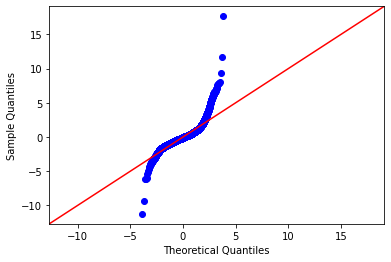

In [43]:
X = data_preprocessed.drop('price', axis=1)
y = data_preprocessed['price']
linreg_process(X, y)

## Some takeaways from the model
- R2 Score:
    - The training got about a .647 meaning that the model explains roughly 65% of the variability of the response data around the mean
    - This is not a great score, but certaily something we can work with
    - When comparing the train and test R2 scores it appears that the test R2 is slightly higher at .648 this seems to indicate some very mild overfitting, but this could also just be randomness in the samples (cross validation should show if this is the case or not)
- P-values:
    - Most of our data is below of the alpha level 0.05, there are quite a few outliers (mostly within some of our one-hot-encoded variables that are certainly skewing the data somewhat
- Mean Squared Error (MSE):
    - This is an extremely high score, this indicates that we have a lot of errors in our modeling and this thing is absolutely no where close to perfect
    - Scaling and transformations should help
- JB Test
    - The JB test indicates that our data is anything but normal (backed up by the QQ plot)
- F stat 
    - Indicates that our data is not homoscedastic
- Overall, our data needs a lot of work to get anywhere close to a respectable model

## Some takeaways from the Q-Q Plot
- We do not have a normal distribution
- looks like a whole lot of our data is heavy on the left, but performing some scaling should help a lot with fixing this. 

## Quick Cross-Validation

In [44]:
#This will give us the mean Mean Squared Error to check our model 
def cross_val(X_data, y_data):
    linreg = LinearRegression()
    X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_data, y_data, test_size=.25, random_state=17)
    predictors = sm.add_constant(X_train_cv)
    linreg.fit(X_train_cv, y_train_cv)
    mse = make_scorer(mean_squared_error)
    cv_5_results = cross_val_score(linreg, X_data, y_data, cv=5, scoring=mse)
    print(cv_5_results.mean())

In [45]:
cross_val(X, y)

48807152240.95346


Not all that far off from our data, we have a lot of work to get this running better

# Scaling 

Let's start the scaling process by taking a look at our most important variable, the target variable price!

Text(0.5, 1.0, 'Distribution of Price with Probability Curve')

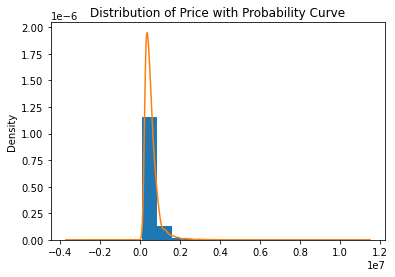

In [46]:
#Plot histogram with probability density to check distribution of y axis
plt.hist(data_preprocessed['price'], density = True)
data_preprocessed['price'].plot.kde()
plt.title("Distribution of Price with Probability Curve")

This shows that our data is heavily skewed, and one of the easiest ways to "normalize" this is to perform a log-transformation.

Text(0.5, 1.0, 'Distribution of Price_log with Probability Curve')

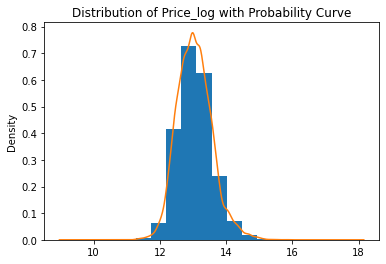

In [47]:
#Now lets start our scaling with normalizing this with a log-transform
data_preprocessed['price_log'] = np.log(data['price'])
plt.hist(data_preprocessed['price_log'], density = True)
data_preprocessed['price_log'].plot.kde()
plt.title("Distribution of Price_log with Probability Curve")

Woo! look at that normal data, now let's get to the independant variables

## Standard Scaler
We're going to start with using a standard scaler on our data. This can be sensitive to outliers, but as we have already mitigated those I am not too concerned about that, what it will do is bring all of our data to a mean of 0 with a standard deviation of 1. This centers the data and brings it to a Gaussian standard normal deviation, which helps with any modeling. 

In [48]:
#Standard scaler 

scaler = StandardScaler()
dataX2 = data_preprocessed.drop(['price_log', 'price'], axis=1)
y2 = data_preprocessed['price_log']
X_scaled = scaler.fit_transform(dataX2)
scaled_df = pd.DataFrame(X_scaled, columns = dataX2.columns) #For later usage as it would normally be an np.array

In [49]:
cv_scaled_df = pd.concat([scaled_df, data_preprocessed['price_log']], axis=1)

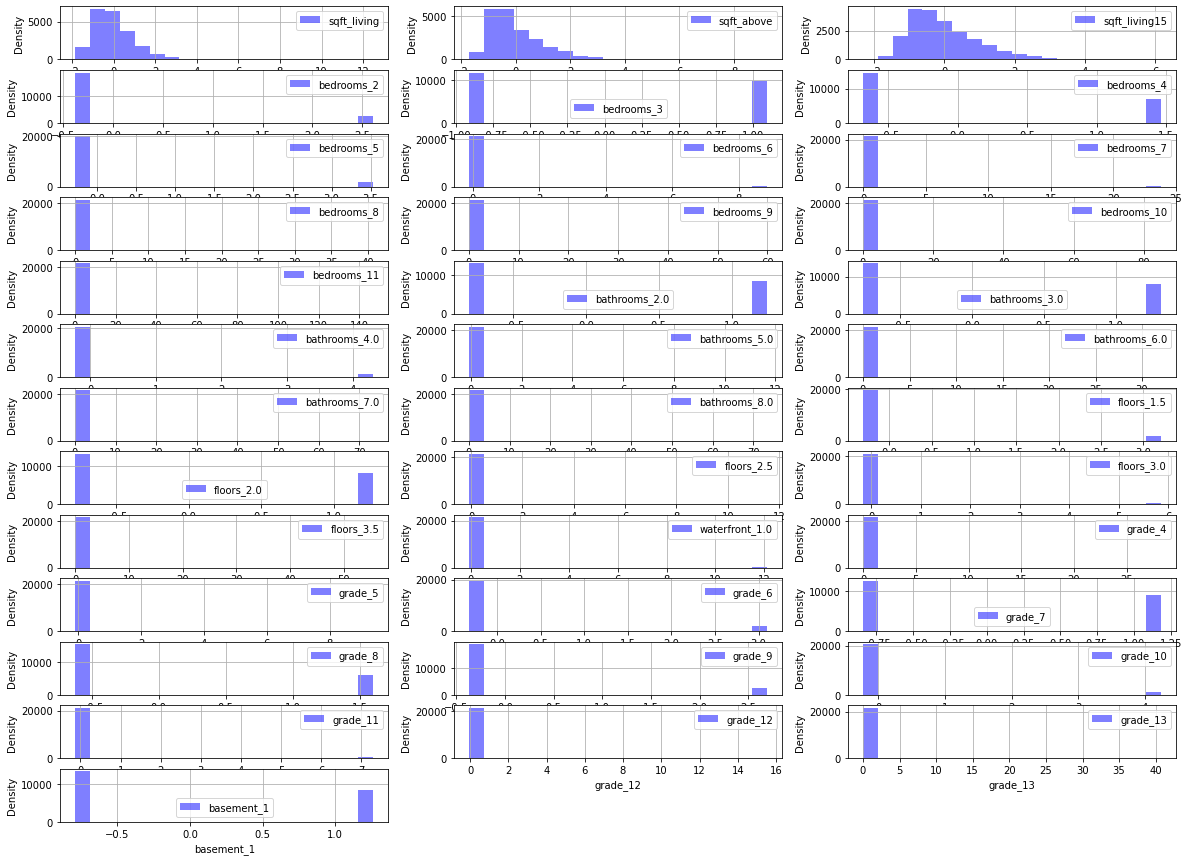

In [50]:
histogram_view(scaled_df)

Compared with the original

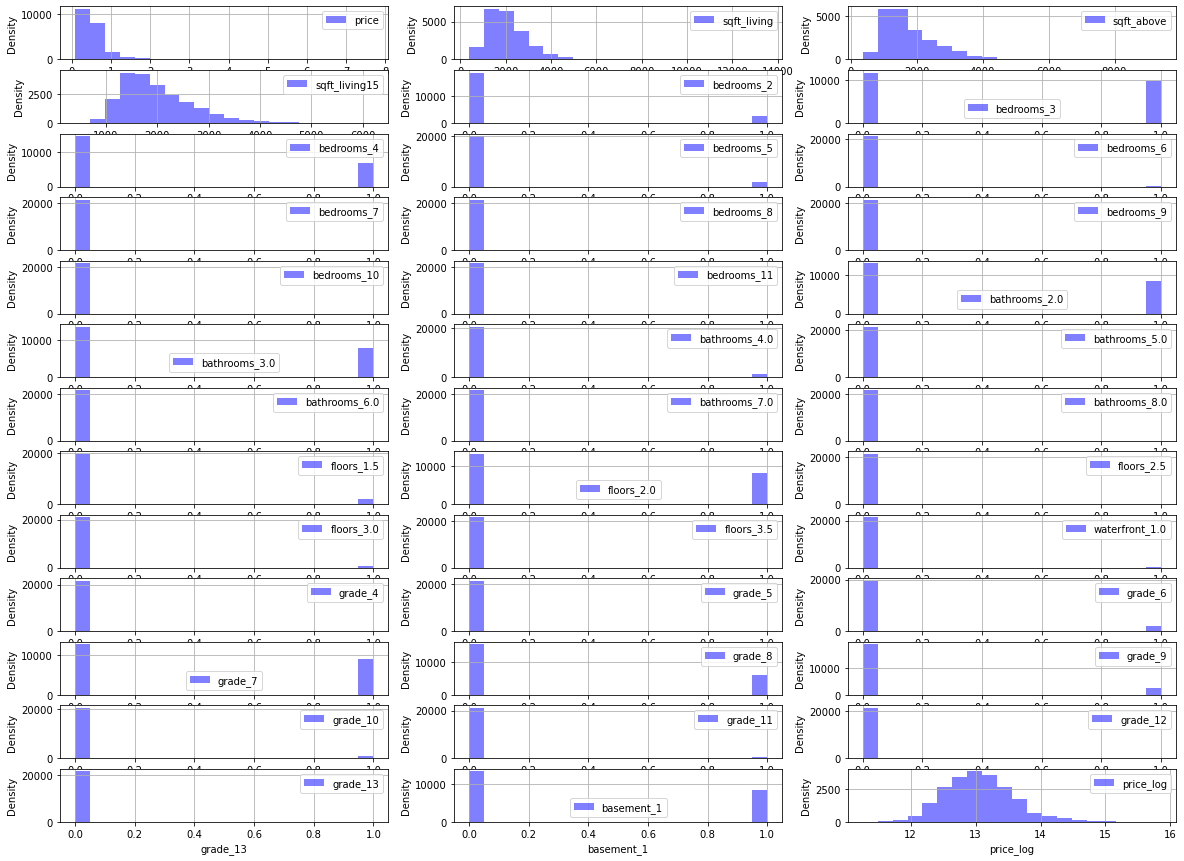

In [51]:
histogram_view(data_preprocessed)

All in all the data is now centered around 0 and looks to be slightly more normal, hopefully we can see the results for real on our model. 

## Model #2 log-transformed y and scaled X

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     688.7
Date:                Wed, 03 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:33:01   Log-Likelihood:                -5032.3
No. Observations:               16194   AIC:                         1.014e+04
Df Residuals:                   16157   BIC:                         1.042e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0458      0.003   5020.401      0.0

<ipython-input-42-dbfb471e5a3b>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


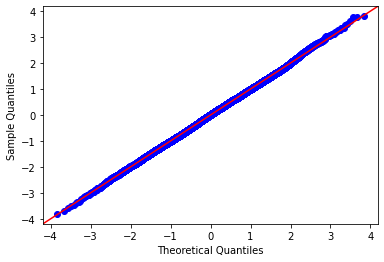

In [52]:
linreg_process(X_scaled, y2)

- R2 Score:
    - Pretty much the same as our first model, nothing much to report here
- P-values:
    - Same issue as before, some of our one_hot_encoded variables are certainly skewing the data some here
- Mean Squared Error (MSE):
    - This is where we saw the best effect on our scaling, as our data is much more normal now, there is not a lot of error in our model, it's just not that good at predicting
- JB Test
    - Massive change here, we have a respectible score showing that our data does not have a lot of skew or kurtosis, it is much closer to normal than before the scaling
- F stat 
    - Indicates that our data is not homoscedastic, we have errors all over the regression line, but it is better than the previous attempt
- Overall, I think we moved in the right direction, but there still isn't much predictive power with this model

## Some takeaways from the Q-Q Plot
- With our scaling it looks like we have achieved the goal of a normal distribution of our residuals!

In [53]:
#Quick cross val for reference
cross_val(X_scaled, y2)

5.073375499028728e+16


This is actually considerably higher than in the tests we ran, we have more vairance from the mean than initially expected.

## Feature Selection
This should help the model by showing us which features from the independant data have the highest 

In [54]:
#We are going to remove the worst 7 variables from our preprocessed data, leaving us with what should be the most
#impactful independant variables

lr = LinearRegression()
selector = RFE(lr, n_features_to_select = 30)
selector = selector.fit(X, y.ravel()) # convert y to 1d np array to prevent DataConversionWarning
selector.support_ 
selected_columns = X.columns[selector.support_ ]


In [55]:
selected_columns

Index(['bedrooms_2', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bedrooms_7',
       'bedrooms_8', 'bedrooms_9', 'bedrooms_10', 'bedrooms_11',
       'bathrooms_4.0', 'bathrooms_5.0', 'bathrooms_6.0', 'bathrooms_7.0',
       'bathrooms_8.0', 'floors_1.5', 'floors_2.5', 'floors_3.0', 'floors_3.5',
       'waterfront_1.0', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
       'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13',
       'basement_1'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     882.8
Date:                Wed, 03 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:33:02   Log-Likelihood:            -2.2278e+05
No. Observations:               16194   AIC:                         4.456e+05
Df Residuals:                   16164   BIC:                         4.459e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           8.158e+05   1.03e+04     79.

<ipython-input-42-dbfb471e5a3b>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


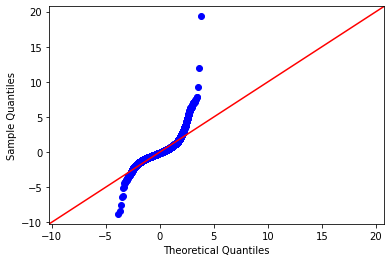

In [56]:
linreg_process(X[selected_columns], y)

## Some takeaways from the model
- R2 Stat got worse, we're still not really getting anywhere with the model
- P-values are now all at 0, which is good
- Mean squared error is the worst that it has ever been
- JB test showing that our data could not be further from normal if we tried
- F stat indicates that our data is not homoscedastic, and it's worse somehow
- Overall, we didn't get anywhere, but I have some hope trying this on our scaled data

In [57]:
cv_scaled_df.dropna(inplace=True)

In [58]:
X_scaled_cv = cv_scaled_df.drop('price_log', axis=1)
y_log_cv = cv_scaled_df['price_log']

In [59]:
#Start up selector that will give us the 5 best features
lr = LinearRegression()
selector = RFE(lr, n_features_to_select = 5)
selector = selector.fit(X_scaled_cv, y_log_cv.ravel()) # convert y to 1d np array to prevent DataConversionWarning
selector.support_ 
selected_columns = scaled_df.columns[selector.support_ ]


In [60]:
X_scaled_cv.shape

(21589, 37)

In [61]:
y_log_cv.shape

(21589,)

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     13.63
Date:                Wed, 03 Feb 2021   Prob (F-statistic):           2.67e-13
Time:                        19:33:02   Log-Likelihood:                -12598.
No. Observations:               16191   AIC:                         2.521e+04
Df Residuals:                   16185   BIC:                         2.525e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0424      0.004   3149.224      0.0

<ipython-input-42-dbfb471e5a3b>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


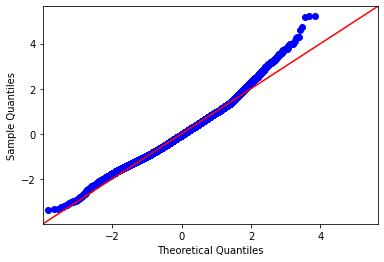

In [62]:
linreg_process(X_scaled_cv[selected_columns], y_log_cv)

## Some takeaways from the model
- Obviously something terrible happened here...

## Log-Transform X Variables w/ Scaler
This time we are going to log transform everything, then use the StandardScaler(), the biggest issue our data was having was it's lack of normality, so this is a last stand for getting that appropriate. 

In [63]:
data_preprocessed.head()

,price,sqft_living,sqft_above,sqft_living15,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,...,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,basement_1,price_log
0,221900.0,1180,1180,1340,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,12.309982
1,538000.0,2570,2170,1690,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,13.195614
2,180000.0,770,770,2720,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,12.100712
3,604000.0,1960,1050,1360,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,13.311329
4,510000.0,1680,1680,1800,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,13.142166


In [64]:
#Start with removing 
data_preprocessed.drop(['price_log'], axis=1, inplace=True)

In [65]:
continuous = ['price', 'sqft_living', 'sqft_above', 'sqft_living15']
data_cont = data_preprocessed[continuous]
log_names = [f'{column}_log' for column in data_cont.columns]
preped_log = np.log(data_preprocessed[continuous])
preped_log.columns = log_names


In [67]:
data_preprocessed.head()

,price,sqft_living,sqft_above,sqft_living15,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,...,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,basement_1
0,221900.0,1180,1180,1340,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,538000.0,2570,2170,1690,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,180000.0,770,770,2720,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,604000.0,1960,1050,1360,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,510000.0,1680,1680,1800,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [68]:
data_preprocessed.drop(continuous, axis=1, inplace=True)


In [69]:
full_preped_df = pd.concat([preped_log, data_preprocessed],axis=1)
full_preped_df.head()

,price_log,sqft_living_log,sqft_above_log,sqft_living15_log,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,...,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,basement_1
0,12.309982,7.073270,7.073270,7.200425,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,13.195614,7.851661,7.682482,7.432484,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,12.100712,6.646391,6.646391,7.908387,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,13.311329,7.580700,6.956545,7.215240,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,13.142166,7.426549,7.426549,7.495542,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [70]:
scaler = StandardScaler()
prep_X = full_preped_df.drop(['price_log'], axis=1)
y_log = full_preped_df['price_log']
X_scaled = scaler.fit_transform(prep_X)

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     687.0
Date:                Wed, 03 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:34:09   Log-Likelihood:                -5044.3
No. Observations:               16194   AIC:                         1.016e+04
Df Residuals:                   16157   BIC:                         1.045e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 8.0974      0.10

<ipython-input-42-dbfb471e5a3b>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


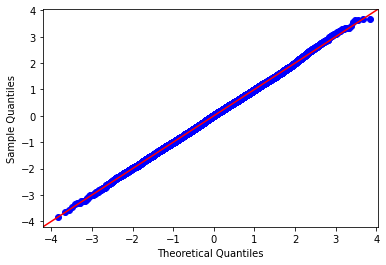

In [71]:
linreg_process(prep_X, y_log)

In [72]:
cross_val(prep_X, y_log)

0.10949017844190456


## Some takeaways
- R2 Score:
    - Ultimately despite our best efforts at scaling the data, the original model managed to perform the best for the percentage of variance explained by the model, but this effort at right around 61% isn't awful.
    - Test R2 was about 1.5% better than the train R2 indicating some mild over-fitting, but nothing out of the ordinary
- P-values: 
    - We had 13 variables above the alpha level, meaning that there was a lot of reason to believe that many of these were not having an effect on our target variable
- Mean Squared Error (MSE):
    - This is where we saw the greatest effect on our model, we did not have a whole lot of errors and overall our regression line was pretty close to the actual values
    - It wasn't 0 (indicating an overfit perfect line), but there wasn't any indication of overfitting when comparing the train and test data
- JB Test:
    - We also performed very well here and showed that we were able to get very normal data out of this set, especially since it started so far off
    - This was also absolutely confirmed in our Q-Q plot
- Overall:
    - This wasn't a terrible model, and essentially can account for roughly 60% of an accurate home price (in layman's terms)
    - We didn't have any significant overfitting, and were able to get very normal data, there is more work that needs to be done to achieve a more accurate model, but we can get into that in the conclusion

# Conclusions
I think this is a great starting point to assist with someone in setting a selling point for their home. with this current model I was able to predict roughly 60% accurate home prices, which leaves a lot to be desired for the homeseller, but there is more work that could certainly be done to improve this further. There is a lot that goes into home selling and unfortunately, due to time constraints, we were not able to model with one of the most important sets of variables...location. I think that a lot of our errors in the modeling came as a result of not having location data and you could see that in some of the outliers. A small home in the Downtown Seattle will be far more expensive than a large home in the furthest reaches of King County. In some ways the issue with this data set was that it was too large, and some future work would be breaking it down by zipcode or geographic area (using latitude and longitude). 

## Further Work
- As I stated in the conclusions section, I think the most important aspect would be breaking down the zipcode and/or longitude and latitude to make smaller models based on more relevant data
- Another thing I would like to do is to break down and seperate some of the larger homes and larger lots
    - Many of these are likely on large plots of cheaper land, and really shouldn't be compared with homes in more desireable locations
